<a href="https://colab.research.google.com/github/Naivaidya3008/capstone_project_machine_learning/blob/main/Naivaidya_tripathi_capstone_project_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Name : Seoul Bike Sharing Demand Prediction </u></b>

# <b><u> Name : Naivaidya Tripathi </u></b>

# <b><u>Group: Cohort Santiago</b></u>

## <b><u>Github:https://github.com/Naivaidya3008/capstone_project_machine_learning</b></u>

## <b> Problem Description </b>

### In many urban areas, the introduction of rental bikes aims to enhance mobility convenience. Ensuring the timely availability and accessibility of these bikes reduces waiting times significantly. Predicting the required bike count per hour is crucial for maintaining a stable rental bike supply throughout the cityscape.







## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Data Preparation**

## **Importing and Inspecting Dataset**

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the dataset
df=pd.read_csv('/content/drive/MyDrive/Seoulbikedata/SeoulBikeData.csv',encoding ='latin',parse_dates=['Date'])

In [4]:
# checking for shape
df.shape

(8760, 14)

In [5]:
#Check all the coloumns present in our dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [6]:
# Renaming Columns
df.rename(columns={'Date': 'date', 'Rented Bike Count': 'bike_count', 'Hour': 'hour',
                   'Temperature(°C)': 'temp', 'Humidity(%)': 'humidity', 'Wind speed (m/s)': 'wind',
                   'Visibility (10m)': 'visibility', 'Dew point temperature(°C)': 'dew_temp',
                   'Solar Radiation (MJ/m2)': 'sunlight', 'Rainfall(mm)': 'rain', 'Snowfall (cm)': 'snow',
                   'Seasons': 'season', 'Holiday': 'holiday', 'Functioning Day': 'functioning_day'}, inplace=True)

In [75]:
# Checking top 5 records in dataframe
df.head()

,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.645894,0.437587,0.891773,0.963663,0.383442
1,0.791725,0.528895,0.568045,0.925597,0.071036,0.087129,0.020218,0.832620,0.778157,0.870012
2,0.978618,0.799159,0.461479,0.780529,0.118274,0.639921,0.143353,0.944669,0.521848,0.414662
3,0.264556,0.774234,0.456150,0.568434,0.018790,0.617635,0.612096,0.616934,0.943748,0.681820
4,0.359508,0.437032,0.697631,0.060225,0.666767,0.670638,0.210383,0.128926,0.315428,0.363711


In [8]:
# Checking bottom 5 records in dataframe
df.tail()

,date,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,season,holiday,functioning_day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             8760 non-null   datetime64[ns]
 1   bike_count       8760 non-null   int64         
 2   hour             8760 non-null   int64         
 3   temp             8760 non-null   float64       
 4   humidity         8760 non-null   int64         
 5   wind             8760 non-null   float64       
 6   visibility       8760 non-null   int64         
 7   dew_temp         8760 non-null   float64       
 8   sunlight         8760 non-null   float64       
 9   rain             8760 non-null   float64       
 10  snow             8760 non-null   float64       
 11  season           8760 non-null   object        
 12  holiday          8760 non-null   object        
 13  functioning_day  8760 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(

In [10]:
df.describe(percentiles=[.01,.25,.5,.75,.99]).transpose()

,count,mean,std,min,1%,25%,50%,75%,99%,max
bike_count,8760.0,704.602055,644.997468,0.0,0.000,191.00,504.50,1065.25,2526.23,3556.00
hour,8760.0,11.500000,6.922582,0.0,0.000,5.75,11.50,17.25,23.00,23.00
temp,8760.0,12.882922,11.944825,-17.8,-12.741,3.50,13.70,22.50,35.10,39.40
humidity,8760.0,58.226256,20.362413,0.0,17.000,42.00,57.00,74.00,97.00,98.00
wind,8760.0,1.724909,1.036300,0.0,0.100,0.90,1.50,2.30,4.70,7.40
visibility,8760.0,1436.825799,608.298712,27.0,173.000,940.00,1698.00,2000.00,2000.00,2000.00
dew_temp,8760.0,4.073813,13.060369,-30.6,-24.800,-4.70,5.10,14.80,24.70,27.20
sunlight,8760.0,0.569111,0.868746,0.0,0.000,0.00,0.01,0.93,3.17,3.52
rain,8760.0,0.148687,1.128193,0.0,0.000,0.00,0.00,0.00,4.00,35.00
snow,8760.0,0.075068,0.436746,0.0,0.000,0.00,0.00,0.00,2.50,8.80


In [11]:
# Missing data counts
df.isnull().sum()

date               0
bike_count         0
hour               0
temp               0
humidity           0
wind               0
visibility         0
dew_temp           0
sunlight           0
rain               0
snow               0
season             0
holiday            0
functioning_day    0
dtype: int64

In [12]:
# Checking duplicates
print(len(df[df.duplicated()]))

0


## **EDA**

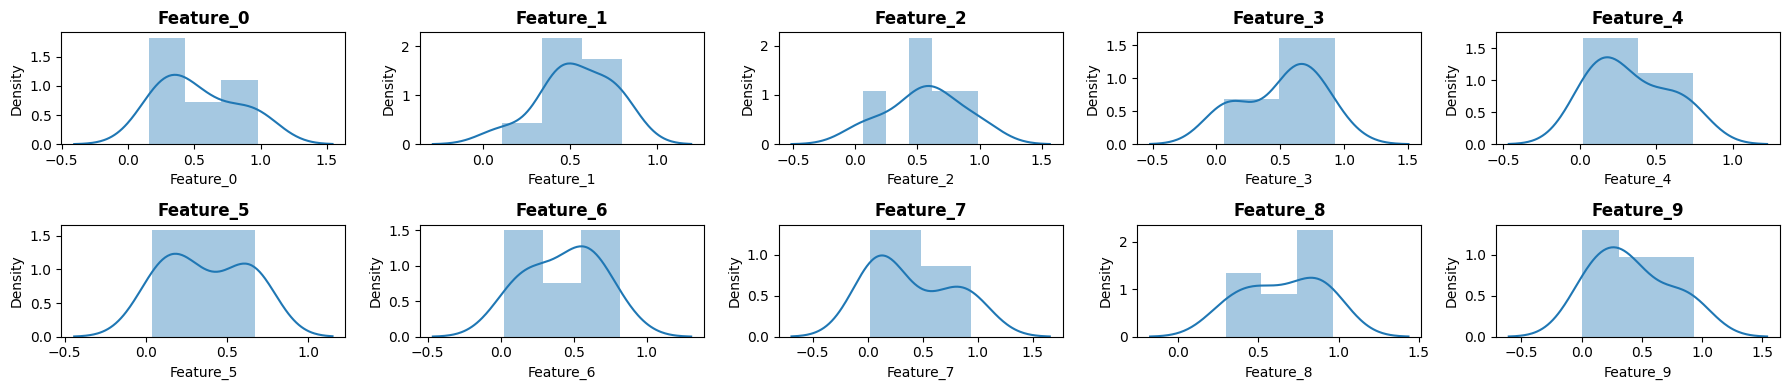

In [76]:
# visualizing the distributions
plt.figure(figsize=(18,4))
for n , column in enumerate(df.describe().columns):
  plt.subplot(2,5,n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

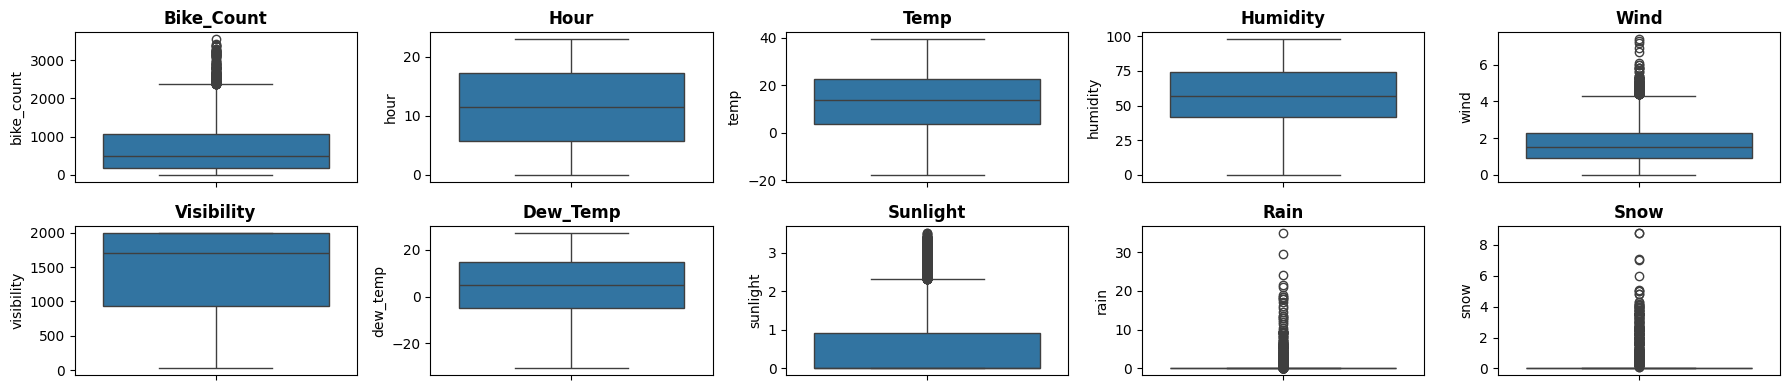

In [17]:
# checking the outliers
plt.figure(figsize=(18,4))
for n,column in enumerate(df.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [18]:
# removing the outliers by using IQR method:
q1, q3, median = df.bike_count.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['bike_count'] = np.where(df['bike_count'] > upper_limit, median,np.where(
                            df['bike_count'] < lower_limit,median,df['bike_count']))

# Removing outliers by Capping:
for col in ['wind','sunlight','rain','snow']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

##**Cleaning and Manipulating dataset**

In [19]:
# Extracting new features from date and hour column
df['weekend']=df['date'].apply(lambda x : 1 if (x.day_name()=='Saturday'or x.day_name()=='Sunday')else 0)
df['timeshift']=df['hour'].apply(lambda x:'night' if  0<=x<=6 else ('day' if 7<=x<=16 else 'evening'))

# dropping the date column
df.drop(columns=['date'], inplace = True)

In [20]:
# Lets take care of the categorical features
categorical_features = [i for i in df.columns if i not in df.describe().columns]
categorical_features

['season', 'holiday', 'functioning_day', 'timeshift']

In [21]:
# Checking unique value with their counts in categorical features
for col in categorical_features:
  print(df[col].value_counts(),'\n')

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: season, dtype: int64 

No Holiday    8328
Holiday        432
Name: holiday, dtype: int64 

Yes    8465
No      295
Name: functioning_day, dtype: int64 

day        3650
night      2555
evening    2555
Name: timeshift, dtype: int64 



In [22]:
# Defining a label encoder based on above data
encoder={'holiday':{'Holiday':1,'No Holiday':0},'functioning_day':{'Yes':1,'No':0},
         'timeshift': {'night':0, 'day':1, 'evening':2}}


# encoder is for dictionary column to make it into the numerical to use in machine learning

In [23]:
# Label Encoding
df = df.replace(encoder)

# One Hot Encoding
df = pd.get_dummies(df, columns=["season"], prefix='', prefix_sep='')

In [24]:
# check the data now
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_temp,sunlight,rain,snow,holiday,functioning_day,weekend,timeshift,Autumn,Spring,Summer,Winter
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,0,0,1
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1


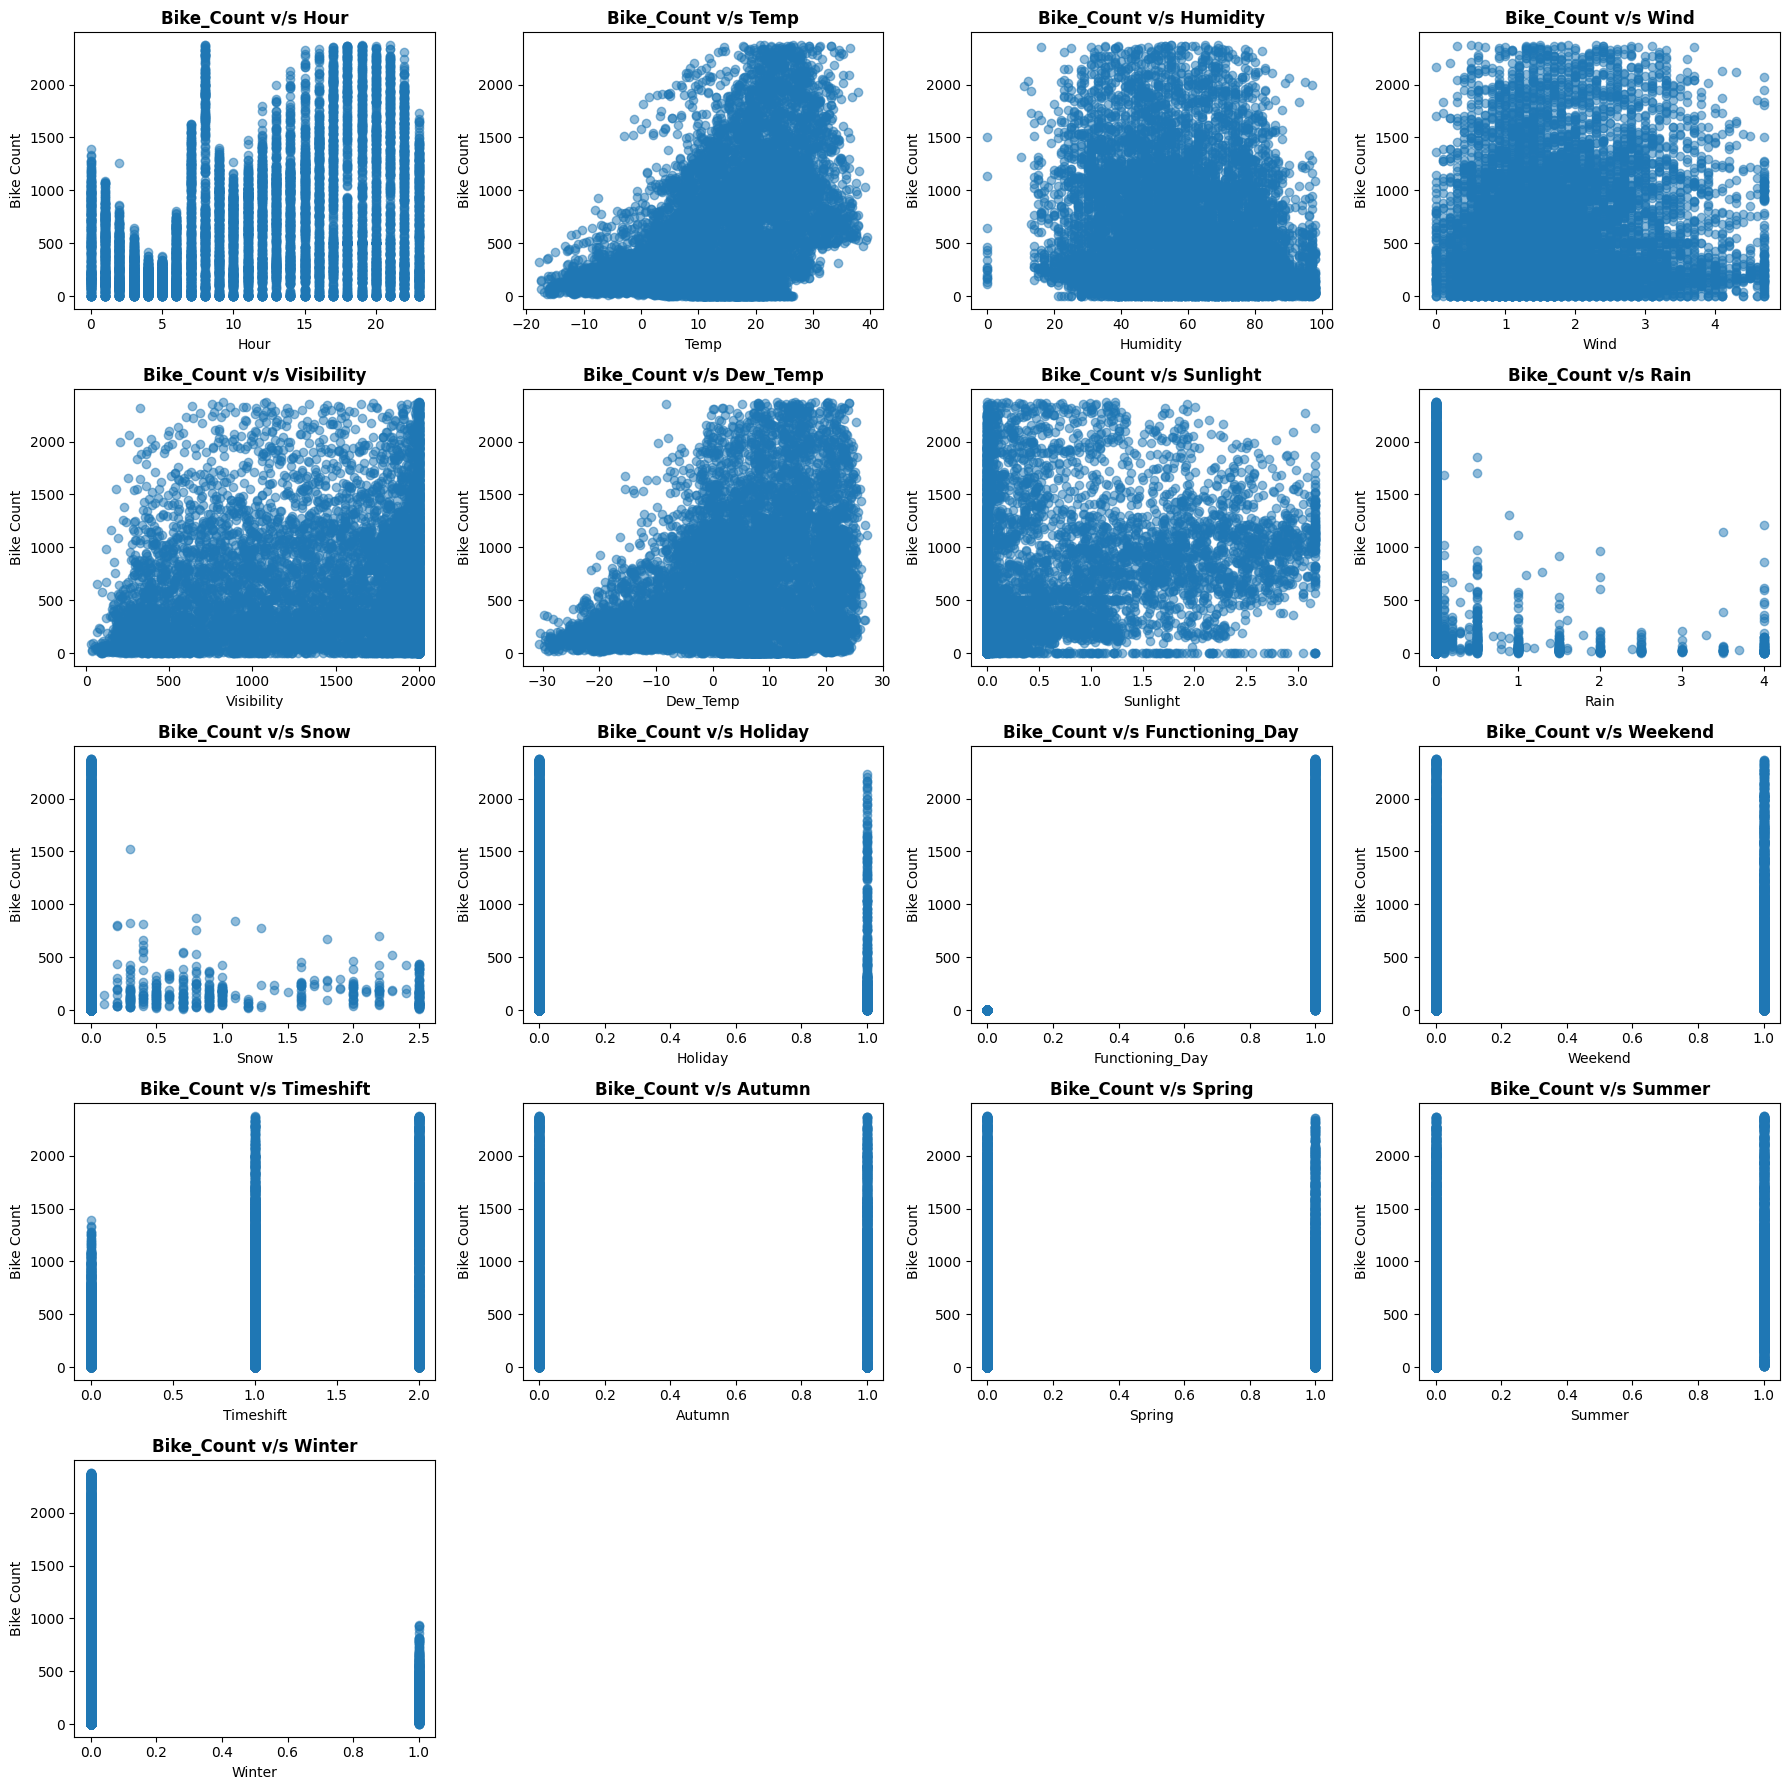

In [27]:
independent_variables = [i for i in df.columns if i not in ['bike_count']]

# Checking Linearity
plt.figure(figsize=(18, 18))
for n, column in enumerate(independent_variables):
    plt.subplot(5, 4, n+1)
    plt.scatter(df[column], df['bike_count'], alpha=0.5)
    plt.title(f'Bike_Count v/s {column.title()}', weight='bold')
    plt.xlabel(column.title())
    plt.ylabel('Bike Count')
    plt.tight_layout()


In [26]:
#checking skewness of the dependend variable
print(f'Skewness of original data : {df.bike_count.skew()}') # data is moderately right skews
print(f'Skewness after log transformation : {np.log(df.bike_count).skew()}')
print(f'Skewness after transformation : {np.sqrt(df.bike_count).skew()}') # skewness is very close to symmetric
#

Skewness of original data : 0.983470199089409
Skewness after log transformation : nan
Skewness after transformation : 0.153123685071092


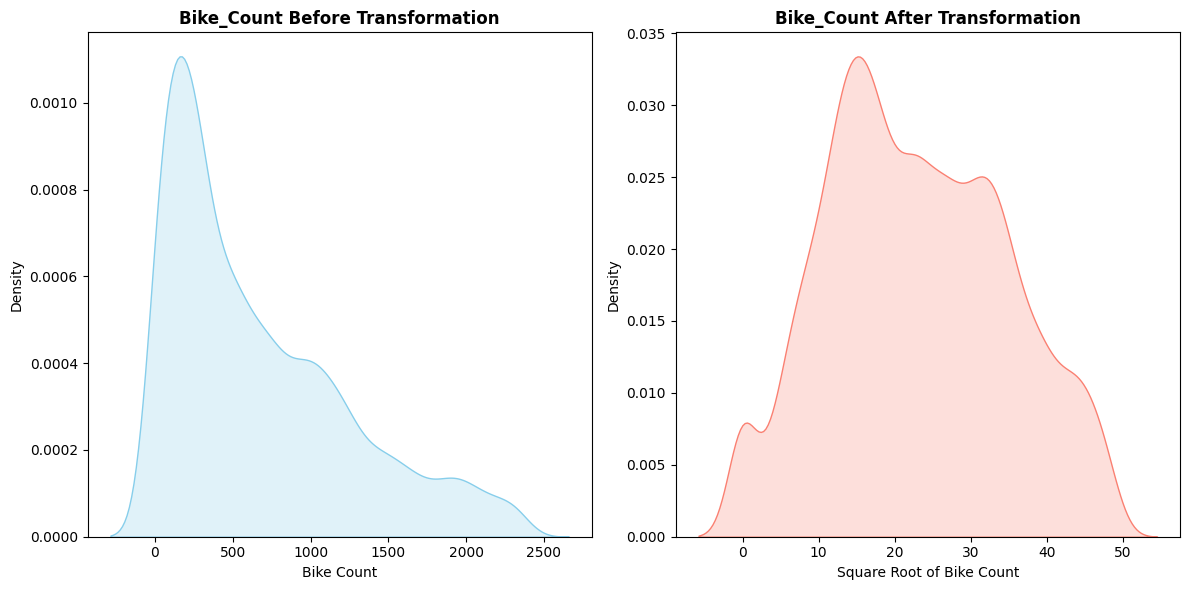

In [28]:
#Since Sqrt Transformation gives skewness between -0.5 and 0.5 indicates that the distribution is fairly symmetrical we will use it
plt.figure(figsize=(12, 6))

# KDE plot for Bike_Count before transformation
plt.subplot(1, 2, 1)
sns.kdeplot(df['bike_count'], shade=True, color='skyblue')
plt.title('Bike_Count Before Transformation', weight='bold')
plt.xlabel('Bike Count')

# KDE plot for Bike_Count after transformation
plt.subplot(1, 2, 2)
sns.kdeplot(np.sqrt(df['bike_count']), shade=True, color='salmon')
plt.title('Bike_Count After Transformation', weight='bold')
plt.xlabel('Square Root of Bike Count')

plt.tight_layout()
plt.show()


##**Removing Multicolinearity**

In [29]:
# Defining a function to calculate Variance Inflation factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif.sort_values(by='VIF',ascending=False).reset_index(drop=True))

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable. VIF score of an independent variable represents how well the variable is explained by other independent variables

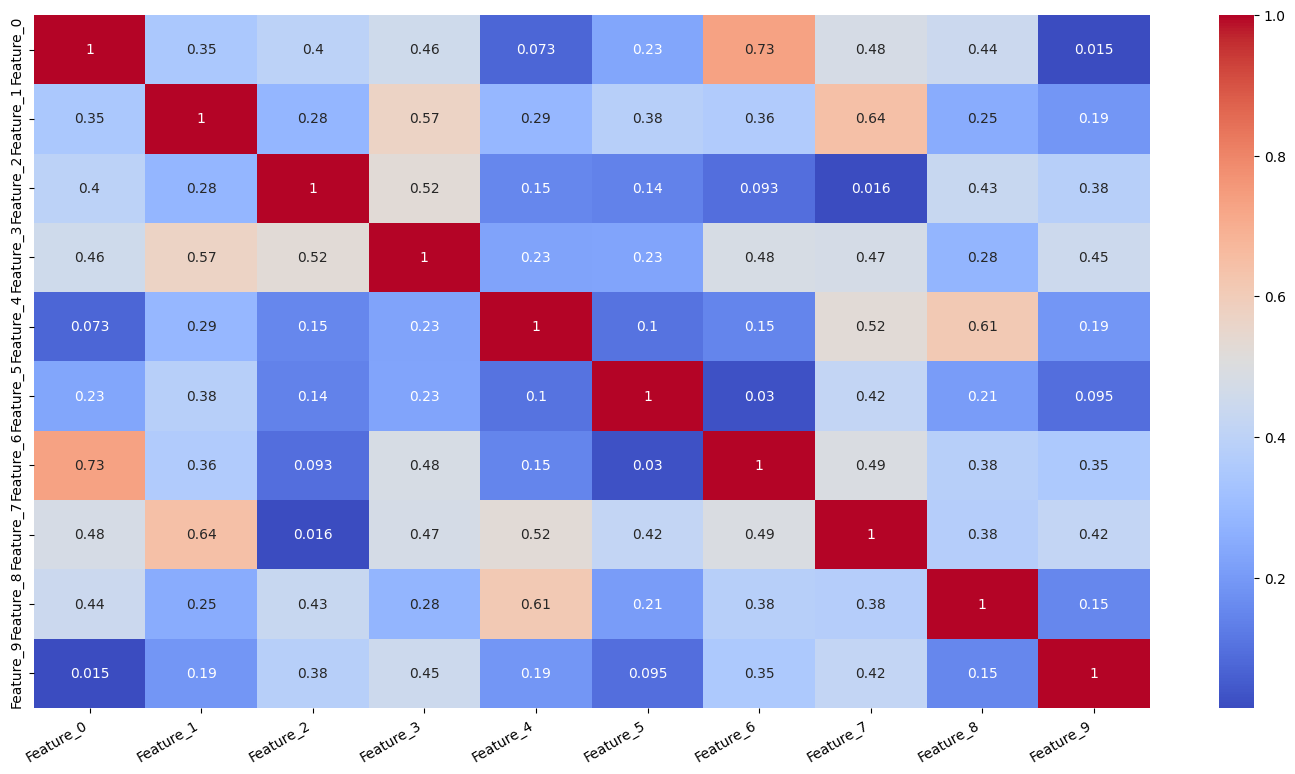

In [57]:
# Checking corelations
plt.figure(figsize=(18,9))
plot=sns.heatmap(abs(df.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

We can see some highly correlated features. Lets treat them by excluding them from dataset and checking the variance inflation factors

In [59]:
# Checking VIF for each variable
independent_variables = [i for i in df.columns if i not in ['bike_count']]
calc_vif(df[independent_variables])

,variables,VIF
0,Feature_3,199.326953
1,Feature_0,192.193065
2,Feature_8,175.178443
3,Feature_2,76.944466
4,Feature_7,44.592357
5,Feature_1,28.862986
6,Feature_6,26.020431
7,Feature_5,14.473056
8,Feature_9,9.231396
9,Feature_4,8.790555


Since Summer and Winter can also be classified on the basis of temperature and we already have that feature present. Even if we drop these features the useful information will not be lost. So lets drop them.

In [60]:
# Summer and Winter are highly correlated with temperature. Hence removing them
independent_variables = [i for i in df.columns if i not in ['bike_count','Winter','Summer','dew_temp','hour','humidity']]
calc_vif(df[independent_variables])

,variables,VIF
0,Feature_3,199.326953
1,Feature_0,192.193065
2,Feature_8,175.178443
3,Feature_2,76.944466
4,Feature_7,44.592357
5,Feature_1,28.862986
6,Feature_6,26.020431
7,Feature_5,14.473056
8,Feature_9,9.231396
9,Feature_4,8.790555


In [74]:
# Update the dataset with the correct variable
dataset = df[independent_variables + ['total_count']]

# Check correlations
plt.figure(figsize=(18,9))
plot = sns.heatmap(abs(dataset.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

KeyError: "['total_count'] not in index"

In [65]:
print("Column names in DataFrame df:", df.columns)


Column names in DataFrame df: Index(['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4',
       'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9'],
      dtype='object')


In [ ]:
# Checking Linearity of the new dataset
plt.figure(figsize=(18,12))
for n,column in enumerate(independent_variables):
  plt.subplot(3, 4, n+1)
  sns.regplot(data = dataset, x = column, y ='bike_count',line_kws={"color": "red"})
  plt.title(f'Bike_Count v/s {column.title()}',weight='bold')
  plt.tight_layout()

In [67]:
# Checking top 5 rows of the cleaned dataset
dataset.head()

NameError: name 'dataset' is not defined

##**Prerequisites**

In [69]:
# Defining variables required
scaler = MinMaxScaler()
y = np.sqrt(df['bike_count'])
features = [i for i in df.columns if i not in ['bike_count']]

KeyError: 'bike_count'

In [68]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test):
  '''Takes regressor model and train test splits as input and prints the
  evaluation matrices with the plot and returns the model'''

  # Fitting the model
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  a,p = y_test**2,y_pred**2

  # Calculating Evaluation Matrix
  mse = mean_squared_error(a,p)
  rmse = np.sqrt(mse)
  r2 = r2_score(a,p)
  try:
    importance = model.feature_importances_
    feature = features
  except:
    importance = np.abs(model.coef_)
    feature = independent_variables
  indices = np.argsort(importance)
  indices = indices[::-1]

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mean_absolute_error(a,p))
  print("Train R2 :", r2_score(y_train**2,model.predict(X_train)**2))
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))

  # Plotting actual and predicted values and the feature importances:
  plt.figure(figsize=(18,6))
  plt.subplot(2,1,1)
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Counts')
  plt.subplot(2,1,2)
  plt.bar(range(len(indices)),importance[indices])
  plt.xticks(range(len(indices)), [feature[i] for i in indices])
  plt.title('Feature Importance')
  plt.tight_layout()
  plt.show()

  return analyse_model

In [ ]:
# Providing the range of values for hyperparameters such as Number of trees:
n_estimators = [50,100,150]

# Maximum depth of trees:
max_depth = [6,8,10]

# Minimum number of samples required to split a node:
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node:
min_samples_leaf = [40,50]

# Learning rate:
eta = [0.05,0.08,0.1]

##**Linear Regressor**

In [ ]:
# Splitting the data into train and test
X = scaler.fit_transform(df[independent_variables])
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)

MSE : 137241.30846867434
RMSE : 370.4609405439045
MAE : 254.74045552944645
Train R2 : 0.5837621350247335
Test R2 : 0.592406259186341
Adjusted R2 :  0.589593651429145


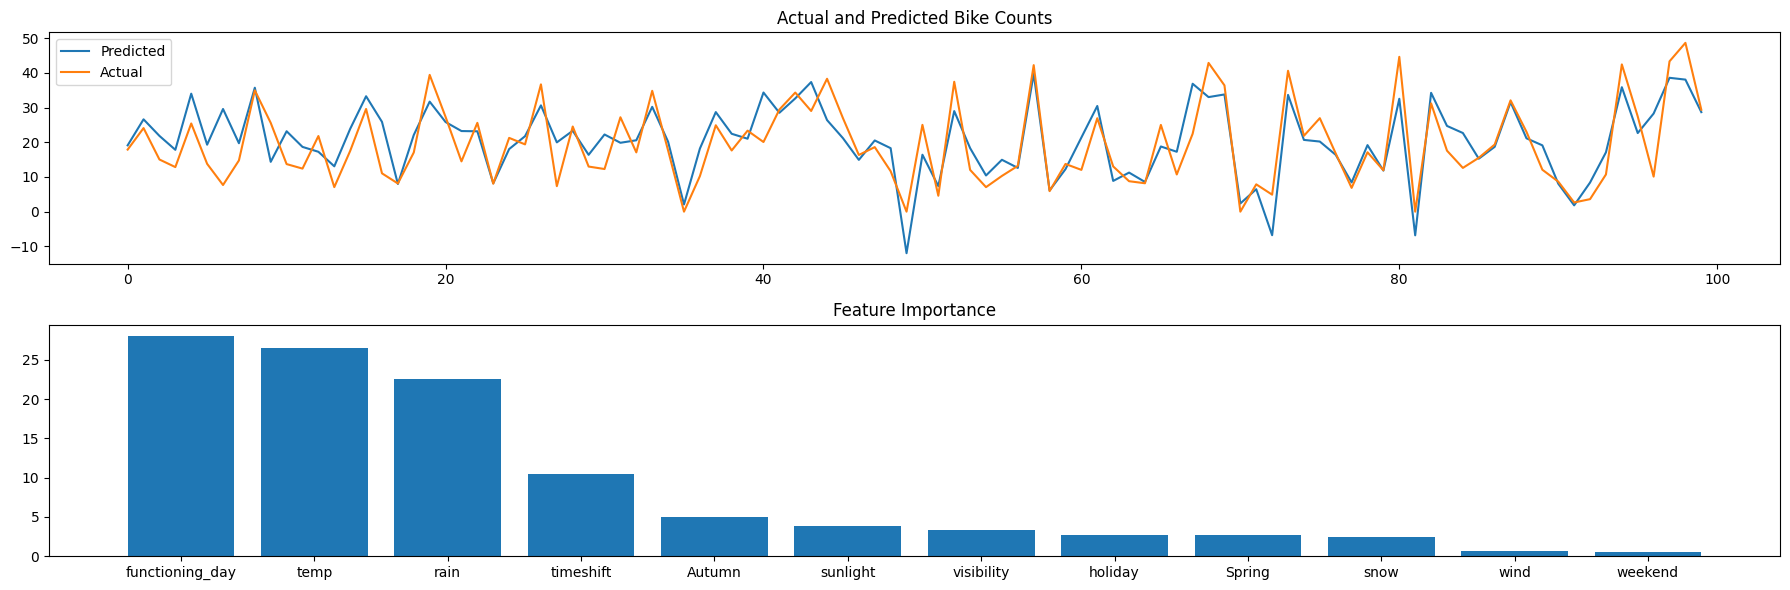

<function __main__.analyse_model(model, X_train, X_test, y_train, y_test)>

In [ ]:
# Fitting Linear Regression Model
lr = LinearRegression()
analyse_model(lr, X_train, X_test, y_train, y_test)

##**Decision Tree Regressor**

In [ ]:
# Splitting the data into train and test by redefining X
X = scaler.fit_transform(df[features])
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)

MSE : 91524.53332018365
RMSE : 302.53021885455286
MAE : 188.5071046099557
Train R2 : 0.7598960015979025
Test R2 : 0.7281807691252598
Adjusted R2 :  0.7255158747049192


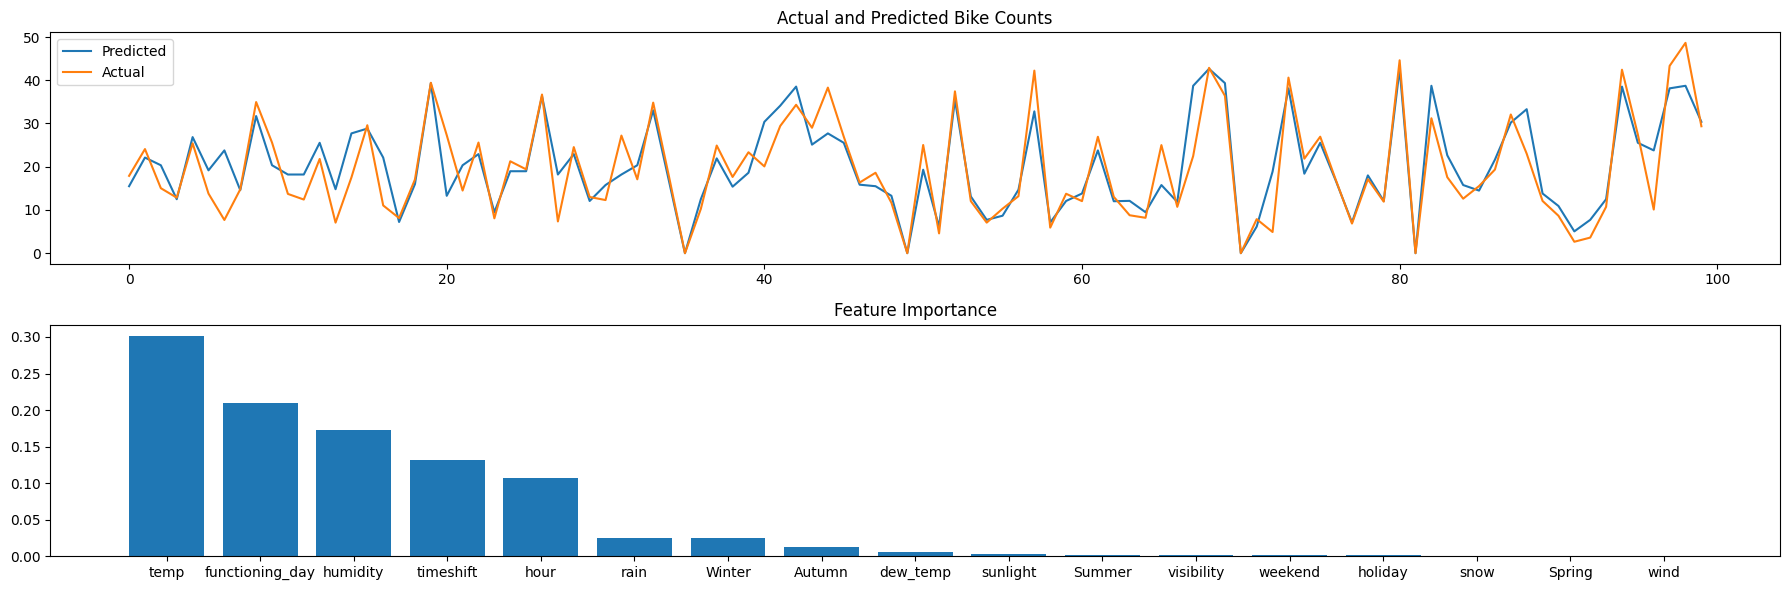

<function __main__.analyse_model(model, X_train, X_test, y_train, y_test)>

In [ ]:
# Regressor
regressor = DecisionTreeRegressor(random_state=1)

# HYperparameter Grid
grid = {'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
dt = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
dt.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(dt.best_estimator_, X_train, X_test, y_train, y_test)

##**Random Forest Regressor**

MSE : 84111.62102061682
RMSE : 290.0200355503337
MAE : 178.30824949226403
Train R2 : 0.7738012599759755
Test R2 : 0.7501964194292182
Adjusted R2 :  0.74774736471774


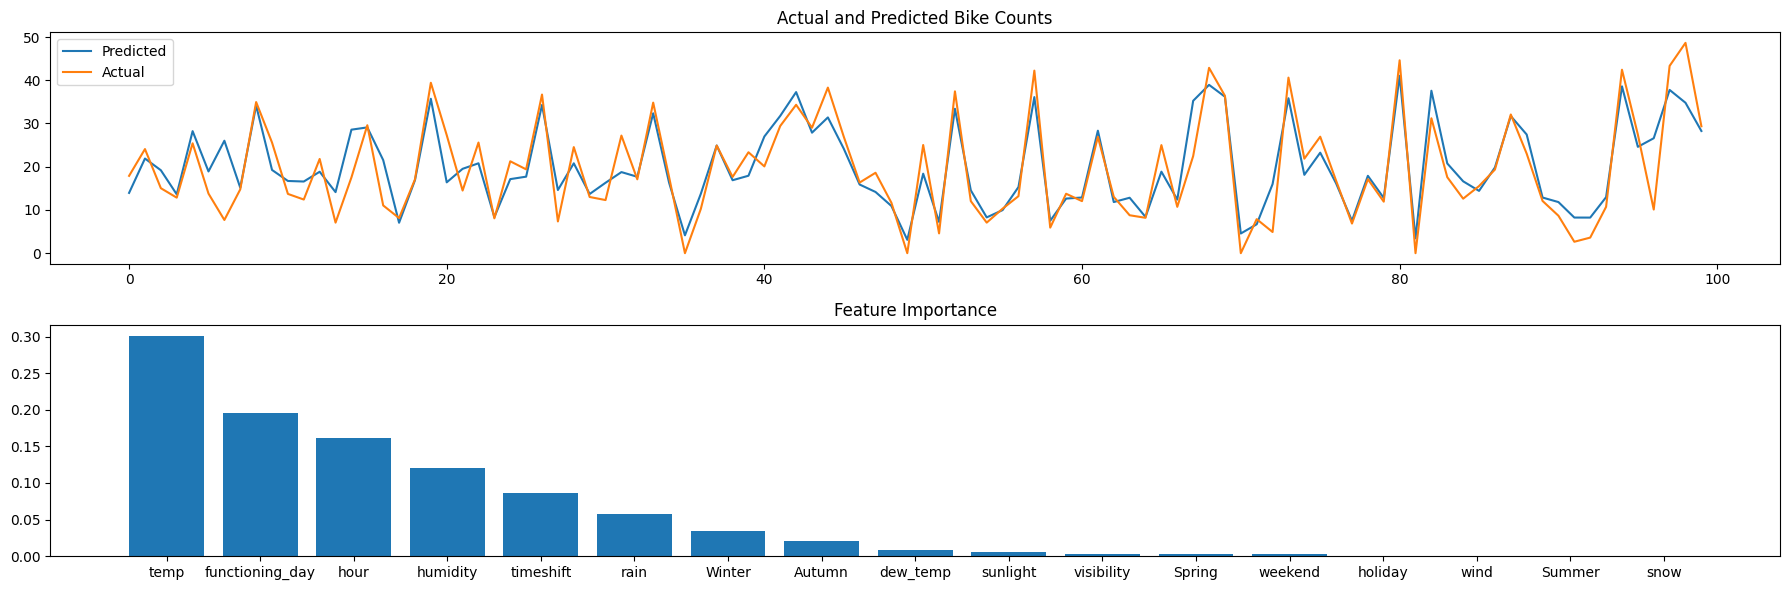

<function __main__.analyse_model(model, X_train, X_test, y_train, y_test)>

In [ ]:
# Regressor
regressor = RandomForestRegressor(random_state=2)

# HYperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
rf = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
rf.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(rf.best_estimator_, X_train, X_test, y_train, y_test)

##**XGBoost Regressor**

In [ ]:
# Regressor
regressor = XGBRegressor(silent=True, random_state=3)

# HYperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf,
        'eta' : eta}

# GridSearch to find the best parameters
xgb = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
xgb.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(xgb.best_estimator_, X_train, X_test, y_train, y_test)

##**GradientBoosting Regressor**

In [ ]:
# Regressor
regressor = GradientBoostingRegressor(random_state=4)

# HYperparameter Grid
grid = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_samples_split,
        'min_samples_leaf' : min_samples_leaf}

# GridSearch to find the best parameters
gbr = GridSearchCV(regressor, param_grid = grid, scoring = 'neg_mean_squared_error', cv=5)
gbr.fit(X_train, y_train)

# Analysing the model with best set of parametes
analyse_model(gbr.best_estimator_, X_train, X_test, y_train, y_test)

##**Conclusion**

1. Functioning day is the most influencing feature and temperature is at the second place for LinearRegressor.
2. Temperature is the most important feature for DecisionTree, RandomForest and GradientBoosting Regressor.
3. Functioning day is the most important feature and Winter is the second most for XGBoostRegressor.
4. RMSE Comparisons:
  1. LinearRegressor RMSE : 370.46
  2. DecissionTreeRegressor RMSE : 302.53
  3. RandomForestRegressor RMSE : 290.02
  4. XGBoostRegressor RMSE : 242.72
  5. GradientBoostingRegressor RMSE : 248.18

5. The feature temperature is on the top list for all the regressors except XGBoost.

6. XGBoost is acting different from all the regressors as it is considering whether it is winter or not. And is it a working day or not. Though winter is also a function of temperature only but it seems this trick of XGBoost is giving better results.
7. XGBoostRegressor has the Least Root Mean Squared Error. So It can be considered as the best model for given problem.